#Indian Liver Patient

This data set contains records of 416 patients diagnosed with liver disease and 167 patients without liver disease. This information is contained in the class label named 'Selector'.  There are 10 variables per patient: age, gender, total Bilirubin, direct Bilirubin, total proteins, albumin, A/G ratio, SGPT, SGOT and Alkphos. Of the 583 patient records, 441 are male, and 142 are female.



##Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid', palette='deep')

In [ ]:
df = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')
df.head()

,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [ ]:
columns = ['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'A/G Ratio', 'Selector']

df.columns = columns

In [ ]:
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [ ]:
df.shape

(582, 11)

##Data Cleaning

In [ ]:
df.isna().sum()

,0
Age,0
Gender,0
TB,0
DB,0
Alkphos,0
Sgpt,0
Sgot,0
TP,0
ALB,0
A/G Ratio,4


In [ ]:
df[df.isna().any(axis=1)]

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
208,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
240,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
252,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
311,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


582 rows, 4 missing values - 4/582 which is 0.6% of the data so we can drop the rows with missing values

In [ ]:
df['A/G Ratio'].unique()

array([0.74, 0.89, 1.  , 0.4 , 1.3 , 1.1 , 1.2 , 0.8 , 0.6 , 0.9 , 0.87,
       0.7 , 0.92, 0.55, 0.5 , 1.85, 0.95, 1.4 , 1.18, 0.61, 1.34, 1.39,
       1.6 , 1.58, 1.25, 0.78, 0.76, 1.55, 0.71, 0.62, 0.67, 0.75, 1.16,
       1.5 , 1.66, 0.96, 1.38, 0.52, 0.47, 0.93, 0.48, 0.58, 0.69, 1.27,
       1.12, 1.06, 0.53, 1.03, 0.68,  nan, 1.9 , 1.7 , 1.8 , 0.3 , 0.97,
       0.35, 1.51, 0.64, 0.45, 1.36, 0.88, 1.09, 1.11, 1.72, 2.8 , 0.46,
       0.39, 1.02, 2.5 , 0.37])

In [ ]:
df.dropna(axis=0)

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
...,...,...,...,...,...,...,...,...,...,...,...
577,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
578,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
579,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
580,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [ ]:
df['Selector'] = df['Selector'].map({1 : 1, 2 : 0})

##Exploratory Data Analysis

In [ ]:
df.describe()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,578.000000,582.000000
mean,44.711340,3.303265,1.488488,290.754296,80.824742,110.068729,6.482646,3.141581,0.947145,0.713058
std,16.181921,6.213926,2.810324,243.108929,182.757696,289.141876,1.086306,0.796176,0.319863,0.452723
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,175.250000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.940000,1.000000
75%,57.750000,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        582 non-null    int64  
 1   Gender     582 non-null    object 
 2   TB         582 non-null    float64
 3   DB         582 non-null    float64
 4   Alkphos    582 non-null    int64  
 5   Sgpt       582 non-null    int64  
 6   Sgot       582 non-null    int64  
 7   TP         582 non-null    float64
 8   ALB        582 non-null    float64
 9   A/G Ratio  578 non-null    float64
 10  Selector   582 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.1+ KB


In [ ]:
df['Selector'].unique()

array([1, 0])

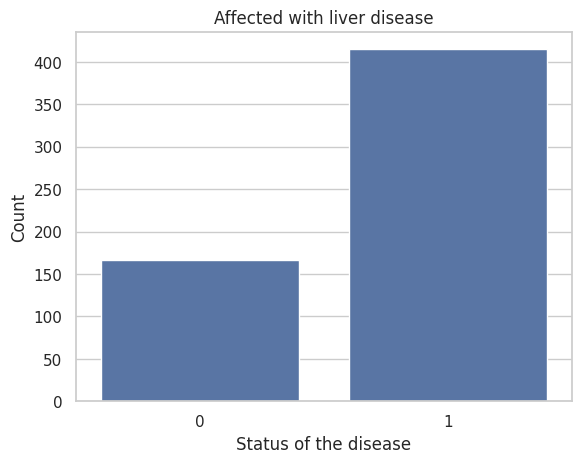

In [ ]:
sns.countplot(data=df, x=df['Selector'])
plt.title('Affected with liver disease')
plt.xlabel('Status of the disease')
plt.ylabel('Count')
plt.show()

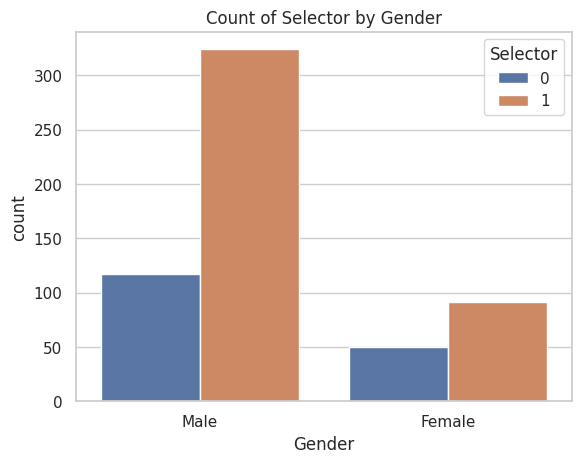

In [ ]:
sns.countplot(data=df, x='Gender', hue='Selector')
plt.title('Count of Selector by Gender')
plt.show()

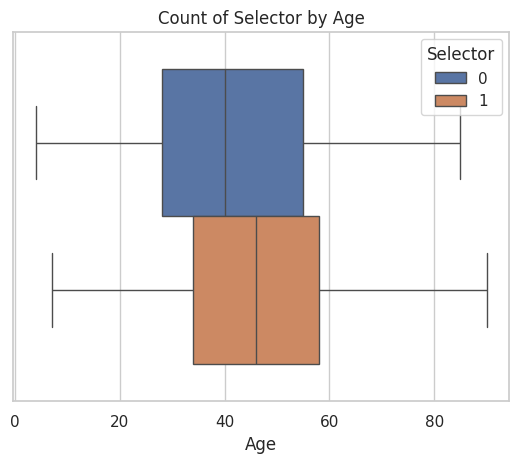

In [ ]:
sns.boxplot(data=df, x='Age', hue='Selector')
plt.title('Count of Selector by Age')
plt.show()

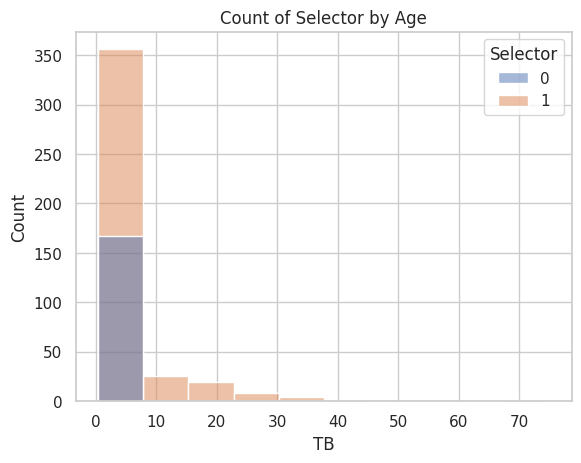

In [ ]:
sns.histplot(data=df, x='TB', hue='Selector', bins=10)
plt.title('Count of Selector by Age')
plt.show()

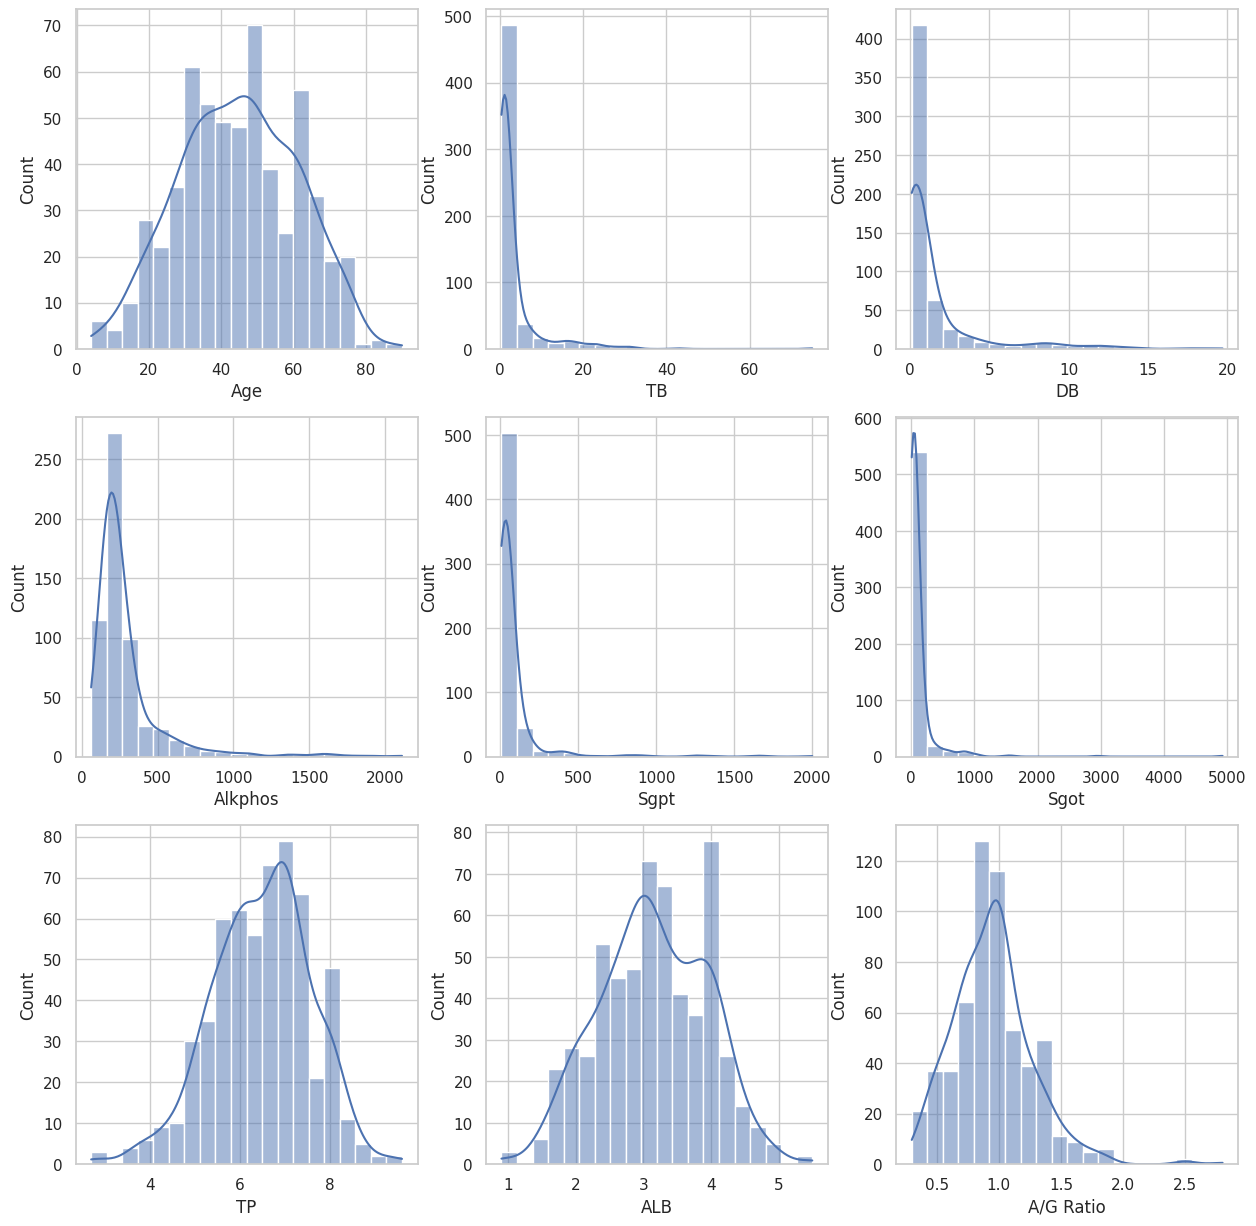

In [ ]:
cols = ['Age', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB',
       'A/G Ratio']

plt.figure(figsize=(15,15))
for i, col in enumerate(cols):
  plt.subplot(3, 3, i + 1)
  sns.histplot(data=df[col], kde=True, bins = 20)

In medical datasets, extreme values often represent real cases — removing them can throw away important patterns.


<Axes: >

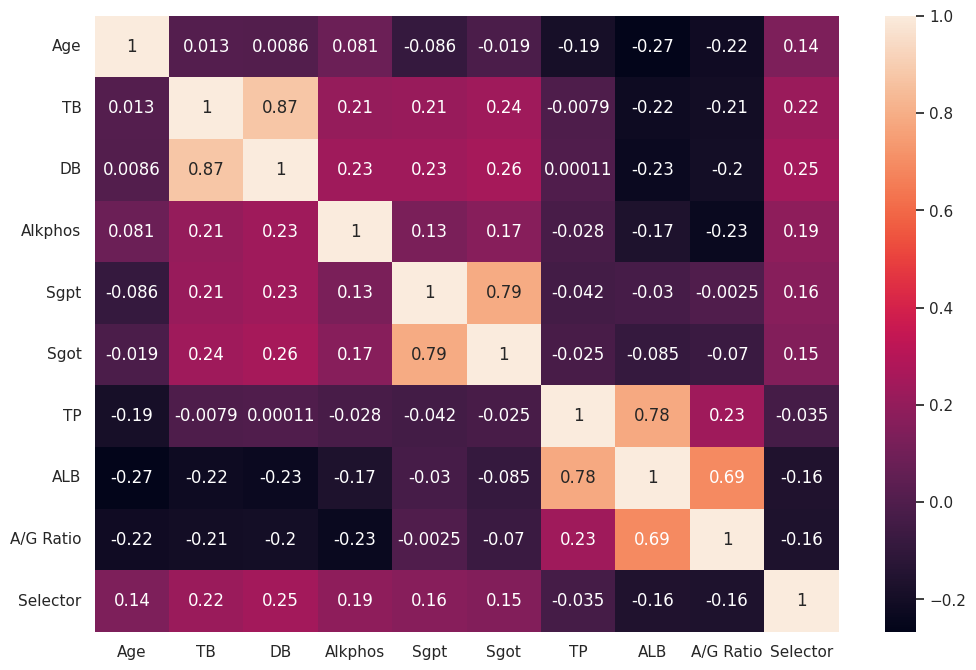

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True)

##Encoding

In [ ]:
X = df.drop(['Selector'], axis=1)
y = df['Selector']

In [ ]:
X = pd.get_dummies(X, columns=["Gender"], dtype=float)
X = X.dropna(axis=0)
y = y.loc[X.index] # Ensure y aligns with the rows remaining in X after dropping NaNs

In [ ]:
df.shape

(582, 11)

In [ ]:
X.shape

(578, 11)

##Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Gender_Female,Gender_Male
250,33,0.9,0.8,680,37,40,5.9,2.6,0.8,0.0,1.0
278,48,1.0,1.4,144,18,14,8.3,4.2,1.0,1.0,0.0
68,60,0.8,0.2,215,24,17,6.3,3.0,0.9,0.0,1.0
473,35,2.0,1.1,226,33,135,6.0,2.7,0.8,0.0,1.0
63,57,1.3,0.4,259,40,86,6.5,2.5,0.6,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
71,75,0.8,0.2,205,27,24,4.4,2.0,0.8,1.0,0.0
106,36,0.8,0.2,158,29,39,6.0,2.2,0.5,0.0,1.0
273,33,1.8,0.8,196,25,22,8.0,4.0,1.0,0.0,1.0
439,49,0.8,0.2,198,23,20,7.0,4.3,1.5,1.0,0.0


In [ ]:
y_train

,Selector
250,1
278,1
68,0
473,0
63,1
...,...
71,1
106,0
273,1
439,1


##Model Selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
def train_evaluate(model_name, model):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(f'{model_name}\n', classification_report(y_pred, y_test))
  print('Confusion Matrix')
  cm = confusion_matrix(y_pred, y_test)
  plt.figure(figsize=(7,5))
  sns.heatmap(cm, annot=True, xticklabels=['Not Affected', 'Affected'], yticklabels=['Not Affected', 'Affected'])

Decision Trees
               precision    recall  f1-score   support

           0       0.57      0.41      0.48        41
           1       0.72      0.83      0.77        75

    accuracy                           0.68       116
   macro avg       0.64      0.62      0.62       116
weighted avg       0.67      0.68      0.67       116

Confusion Matrix


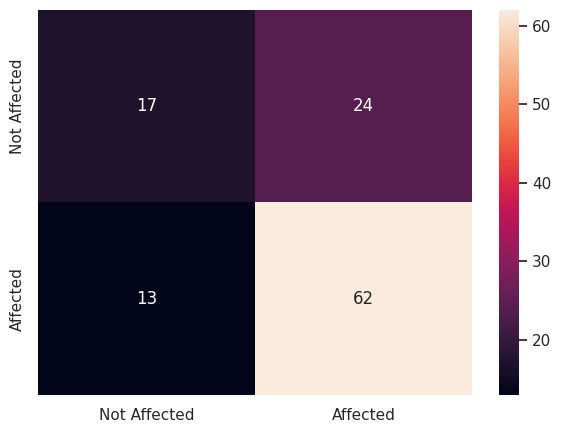

In [ ]:
train_evaluate('Decision Trees', DecisionTreeClassifier())

Random Forest
               precision    recall  f1-score   support

           0       0.33      0.56      0.42        18
           1       0.91      0.80      0.85        98

    accuracy                           0.76       116
   macro avg       0.62      0.68      0.63       116
weighted avg       0.82      0.76      0.78       116

Confusion Matrix


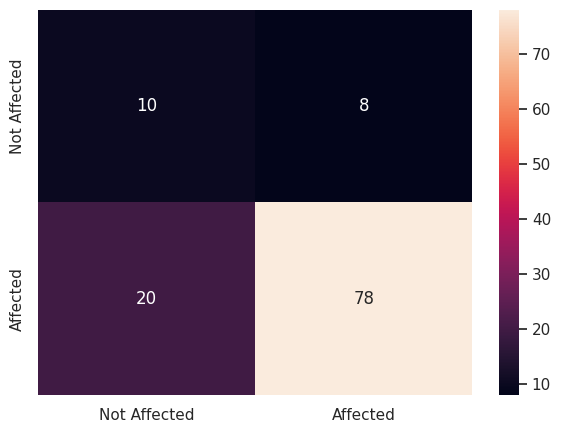

In [ ]:
train_evaluate('Random Forest', RandomForestClassifier(class_weight={0:20, 1:1}, random_state=42))

XGBoost
               precision    recall  f1-score   support

           0       0.37      0.46      0.41        24
           1       0.85      0.79      0.82        92

    accuracy                           0.72       116
   macro avg       0.61      0.63      0.61       116
weighted avg       0.75      0.72      0.73       116

Confusion Matrix


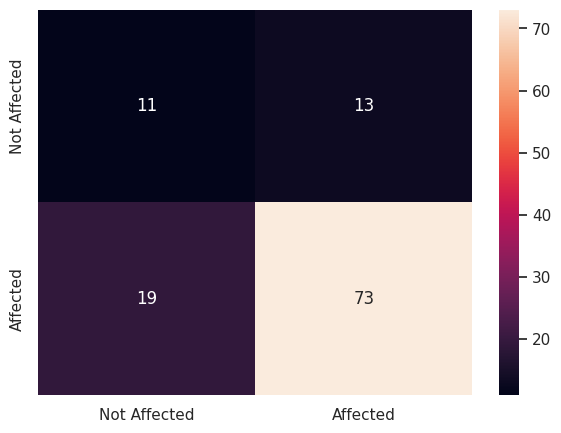

In [ ]:
train_evaluate('XGBoost', XGBClassifier())

Gradient Boost
               precision    recall  f1-score   support

           0       0.33      0.56      0.42        18
           1       0.91      0.80      0.85        98

    accuracy                           0.76       116
   macro avg       0.62      0.68      0.63       116
weighted avg       0.82      0.76      0.78       116

Confusion Matrix


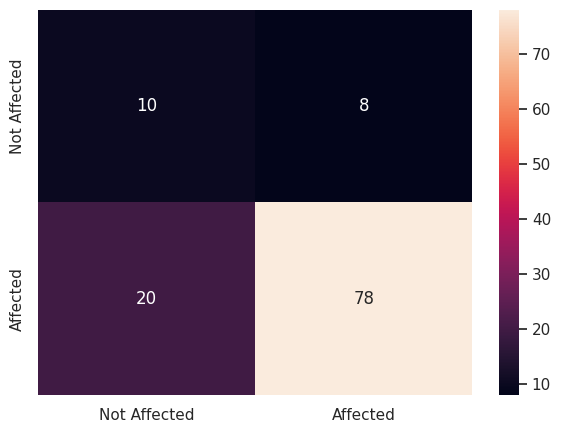

In [ ]:
train_evaluate('Gradient Boost', GradientBoostingClassifier())

In [ ]:
df.columns

Index(['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB',
       'A/G Ratio', 'Selector'],
      dtype='object')

In [ ]:
df['Selector'].value_counts()

,count
Selector,
1,415
0,167


In [ ]:
df.shape

(582, 11)

In [ ]:
n_estimators = [20, 60, 80, 100]
max_features = [0.2, 0.6, 1.0]
max_samples = [0.5, 0.75, 1.0]


In [ ]:
param_grid = {'n_estimators':n_estimators,
              'max_features': max_features,
              'max_samples': max_samples,
              }

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, verbose=2, n_jobs=-1, scoring='f1_macro')
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 80, 100]},
             scoring='f1_macro', verbose=2)

Random Forest with Best Params
               precision    recall  f1-score   support

           0       0.40      0.48      0.44        25
           1       0.85      0.80      0.82        91

    accuracy                           0.73       116
   macro avg       0.62      0.64      0.63       116
weighted avg       0.75      0.73      0.74       116

Confusion Matrix


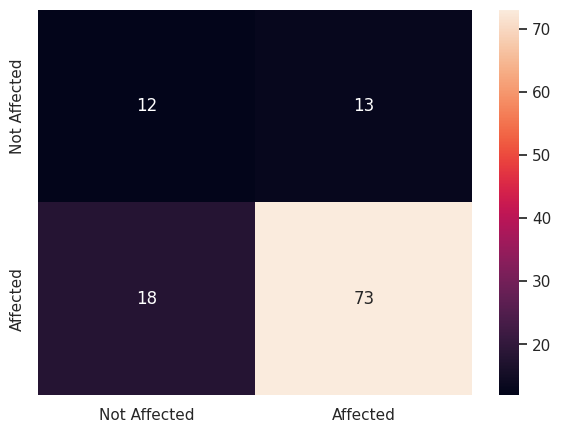

In [ ]:
best_rf_model = rf_grid.best_estimator_
train_evaluate('Random Forest with Best Params', best_rf_model)

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define a parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create GridSearchCV object
xgb_grid = GridSearchCV(estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                       param_grid=param_grid_xgb, cv=5, verbose=2, n_jobs=-1, scoring='f1_macro')

# Fit the grid search to the data
xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:35:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 1.0]},
             scoring='f1_macro', verbose=2)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:35:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost with Best Params
               precision    recall  f1-score   support

           0       0.37      0.50      0.42        22
           1       0.87      0.80      0.83        94

    accuracy                           0.74       116
   macro avg       0.62      0.65      0.63       116
weighted avg       0.78      0.74      0.76       116

Confusion Matrix


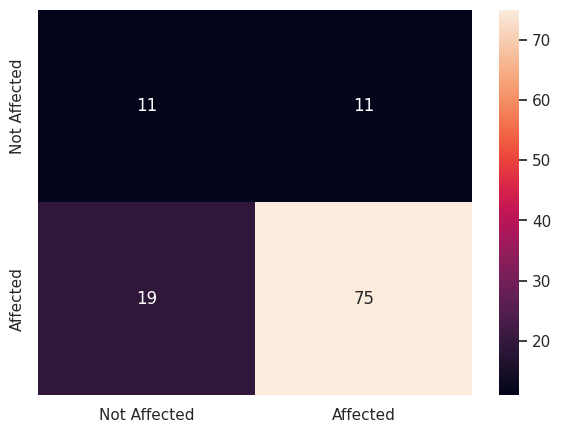

In [ ]:
best_xgb_model = xgb_grid.best_estimator_
train_evaluate('XGBoost with Best Params', best_xgb_model)

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
  n_estimators = trial.suggest_int('n_estimators', 50, 200)
  max_depth = trial.suggest_int('max_depth', 3, 20)

  model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)

  score = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()

  return score

In [ ]:
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=50)

[I 2025-08-17 06:42:39,487] A new study created in memory with name: no-name-14610b3a-4a2f-421d-8943-97cdf62e4168
[I 2025-08-17 06:42:40,160] Trial 0 finished with value: 0.7034632034632033 and parameters: {'n_estimators': 143, 'max_depth': 18}. Best is trial 0 with value: 0.7034632034632033.
[I 2025-08-17 06:42:41,026] Trial 1 finished with value: 0.6969696969696969 and parameters: {'n_estimators': 193, 'max_depth': 7}. Best is trial 0 with value: 0.7034632034632033.
[I 2025-08-17 06:42:41,609] Trial 2 finished with value: 0.6969696969696969 and parameters: {'n_estimators': 120, 'max_depth': 11}. Best is trial 0 with value: 0.7034632034632033.
[I 2025-08-17 06:42:42,260] Trial 3 finished with value: 0.7012987012987013 and parameters: {'n_estimators': 142, 'max_depth': 19}. Best is trial 0 with value: 0.7034632034632033.
[I 2025-08-17 06:42:42,682] Trial 4 finished with value: 0.6948051948051948 and parameters: {'n_estimators': 85, 'max_depth': 9}. Best is trial 0 with value: 0.7034632

## Summary:

### Data Analysis Key Findings

*   The project aims to predict liver disease using the Indian Liver Patient Dataset.
*   The dataset contains 11 attributes, including demographic and clinical features, and a target variable ('Selector') indicating the presence (1) or absence (0) of liver disease.
*   Missing values were found only in the 'A/G Ratio' column and were handled by dropping the 4 rows with missing data.
*   Initial model evaluation showed that Random Forest and Gradient Boosting with adjusted class weights achieved the highest accuracy (76%).
*   Hyperparameter tuning using GridSearchCV and Optuna was performed on Random Forest and XGBoost models.
*   After tuning, the XGBoost model optimized with GridSearchCV for 'f1\_macro' showed improved balanced performance across both classes, making it a strong candidate model.

### Insights or Next Steps

*   The class imbalance in the dataset was addressed during model training (e.g., using class weights) and evaluation (using f1-macro), which is crucial for building a reliable prediction model for the minority class.
*   Future work could explore other techniques for handling class imbalance, such as oversampling or undersampling, and evaluate their impact on model performance.
